In [2]:
import pandas as pd
import numpy as np

### 读取数据

In [3]:
df = pd.read_csv("./restaurant-BV.csv")

In [4]:
df.head()

,pizza,egg-tomato,bean,Fish in oil,coca_cola,humberger,franch_frise,dessert,family_portrait_package,dumplings,business volume
0,293,667,556,39,563,727,753,508,15,7,31715
1,293,445,348,148,617,668,638,598,5,26,33734
2,330,875,569,131,789,929,905,787,0,22,43498
3,209,856,350,48,523,696,594,493,90,13,34425
4,325,967,292,65,587,657,731,608,68,7,37969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   pizza                    10000 non-null  int64
 1   egg-tomato               10000 non-null  int64
 2   bean                     10000 non-null  int64
 3   Fish in oil              10000 non-null  int64
 4   coca_cola                10000 non-null  int64
 5   humberger                10000 non-null  int64
 6   franch_frise             10000 non-null  int64
 7   dessert                  10000 non-null  int64
 8   family_portrait_package  10000 non-null  int64
 9   dumplings                10000 non-null  int64
 10  business volume          10000 non-null  int64
dtypes: int64(11)
memory usage: 859.5 KB


In [6]:
df.isnull().sum()

pizza                      0
egg-tomato                 0
bean                       0
Fish in oil                0
coca_cola                  0
humberger                  0
franch_frise               0
dessert                    0
family_portrait_package    0
dumplings                  0
business volume            0
dtype: int64

### 数据的清洗处理

In [7]:
df.head(3)
df.columns

Index(['pizza', 'egg-tomato', 'bean', 'Fish in oil', 'coca_cola', 'humberger',
       'franch_frise', 'dessert', 'family_portrait_package', 'dumplings',
       'business volume'],
      dtype='object')

### 数据的统计分析

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

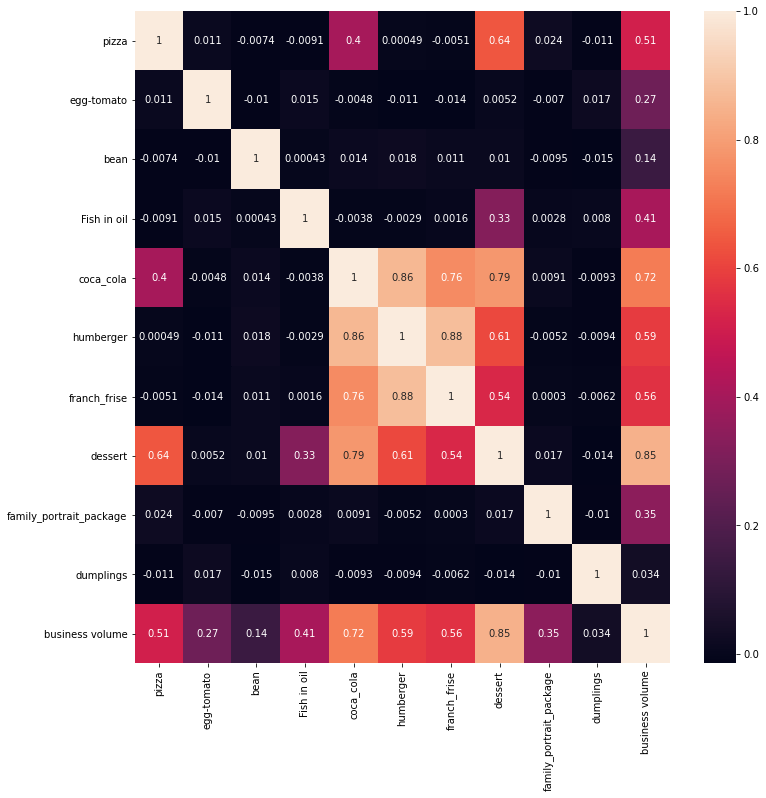

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

### 特征工程

#### 数值字段-标准化

In [10]:
num_columns = ['pizza', 'egg-tomato', 'bean', 'Fish in oil', 'coca_cola', 'humberger',
       'franch_frise', 'dessert', 'family_portrait_package', 'dumplings'
              ]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standardScaler = StandardScaler()

In [13]:
num_features = standardScaler.fit_transform(df[num_columns])
num_features

array([[-0.0616039 , -0.20565937,  0.73116779, ..., -0.73938998,
        -1.16298941, -1.42165435],
       [-0.0616039 , -1.48445285, -0.70494899, ...,  0.09312618,
        -1.50261281,  1.11089697],
       [ 0.25860966,  0.99248948,  0.82092509, ...,  1.84141012,
        -1.67242452,  0.57772827],
       ...,
       [ 0.58747764,  0.63534896,  0.9244912 , ..., -0.276881  ,
         0.05965485,  1.11089697],
       [ 0.79518374,  1.55124159, -1.06397819, ..., -0.54513621,
        -0.34789324, -1.28836217],
       [ 1.47888296,  0.04203486,  0.71045457, ...,  2.23916784,
        -0.85732834,  1.37748132]])

#### 构建X和Y

In [14]:
X = num_features
X

array([[-0.0616039 , -0.20565937,  0.73116779, ..., -0.73938998,
        -1.16298941, -1.42165435],
       [-0.0616039 , -1.48445285, -0.70494899, ...,  0.09312618,
        -1.50261281,  1.11089697],
       [ 0.25860966,  0.99248948,  0.82092509, ...,  1.84141012,
        -1.67242452,  0.57772827],
       ...,
       [ 0.58747764,  0.63534896,  0.9244912 , ..., -0.276881  ,
         0.05965485,  1.11089697],
       [ 0.79518374,  1.55124159, -1.06397819, ..., -0.54513621,
        -0.34789324, -1.28836217],
       [ 1.47888296,  0.04203486,  0.71045457, ...,  2.23916784,
        -0.85732834,  1.37748132]])

In [15]:
y = df["business volume"].to_numpy()
y

array([31715, 33734, 43498, ..., 34920, 34285, 45983], dtype=int64)

### 模型训练

#### 数据集划分

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

#### 随机森林

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [20]:
random_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [21]:
random_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [22]:
y_pred = random_model.predict(X_test)
y_pred

array([41077.80333333, 39769.14333333, 41787.81333333, ...,
       38966.36333333, 35502.17      , 44082.72      ])

In [23]:
random_model.score(X_train, y_train)

0.9945702318076757

In [24]:
random_model.score(X_test, y_test)

0.9608928808505668

### 训练线性回归模型

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model = LinearRegression()

In [27]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [28]:
lr_model.score(X_train, y_train)

1.0

In [29]:
lr_model.score(X_test, y_test)

1.0

### 储存模型

In [30]:
model_dir = "./flask-carprice/models"

In [31]:
import joblib

In [32]:
joblib.dump(random_model, f"{model_dir}/random_model.joblib")

['./flask-carprice/models/random_model.joblib']

In [33]:
joblib.dump(standardScaler, f"{model_dir}/standardScaler.joblib")

['./flask-carprice/models/standardScaler.joblib']

In [35]:
df.sample(1).to_json()

'{"pizza":{"4047":180},"egg-tomato":{"4047":435},"bean":{"4047":286},"Fish in oil":{"4047":78},"coca_cola":{"4047":546},"humberger":{"4047":694},"franch_frise":{"4047":685},"dessert":{"4047":477},"family_portrait_package":{"4047":40},"dumplings":{"4047":6},"business volume":{"4047":28990}}'